# Visa Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### Problem Statement:

The Office of Foreign Labor Certification (OFLC) handles job certification applications for employers seeking to hire foreign workers in the U.S. Due to a high volume of applications, OFLC aims to automate the process of recommending visa approvals or denials using machine learning models.

In this project, we will develop a **classification model** to predict whether a visa will be approved or denied, based on historical applicant data. The model will analyze key features that influence the visa decision and recommend profiles for certification or denial.

### Import Required Packages and Data

In [2]:
# Importing essential libraries for data manipulation, visualization, and numerical computations
import pandas as pd  # For handling data structures like DataFrame
import numpy as np   # For numerical operations on arrays

# Libraries for visualizations
import matplotlib.pyplot as plt  # Core plotting library
import seaborn as sns            # Advanced statistical visualizations
import plotly.express as px      # Interactive visualizations

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")  # Ignore any warning messages

# Ensure that plots are displayed inline in Jupyter notebooks
%matplotlib inline


**Load the CSV data into a DataFrame**

In [3]:
df = pd.read_csv("EasyVisa.csv")

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Shape of the dataset**

In [5]:
df.shape

(25480, 12)

**Summary of the dataset**

In [6]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### **Insights**

**1- no_of_employees**
- **Count**: There are 25,480 records.
- **Mean**: The average number of employees is approximately 5,667.
- **Standard Deviation (std)**: The number of employees varies widely, with a standard deviation of about 22,878, indicating significant variability in the number of employees among the records.
- **Min/Max**: The minimum number of employees is -26 (which might indicate data entry errors or a placeholder value), while the maximum is 602,069, suggesting some organizations have very large employee counts.
- **Percentiles**:
  - **25%**: 25% of the organizations have 1,022 or fewer employees.
  - **50% (Median)**: The median number of employees is 2,109, indicating that half of the organizations have fewer employees than this value.
  - **75%**: 75% of organizations have 3,504 or fewer employees.

 **2- yr_of_estab**
- **Count**: There are 25,480 records.
- **Mean**: The average year of establishment is approximately 1979. This suggests that many organizations were established in the late 20th century.
- **Standard Deviation (std)**: The standard deviation is about 42 years, indicating some organizations are much older or newer than the average.
- **Min/Max**: The earliest year of establishment is 1800, and the latest is 2016.
- **Percentiles**:
  - **25%**: 25% of the organizations were established in or before 1976.
  - **50% (Median)**: The median year of establishment is 1997, meaning half of the organizations were established before this year.
  - **75%**: 75% of organizations were established in or before 2005.

 **3- prevailing_wage**
- **Count**: There are 25,480 records.
- **Mean**: The average prevailing wage is approximately $74,456, indicating the average salary level.
- **Standard Deviation (std)**: The standard deviation of about $52,816 suggests a wide range of wage distributions across organizations.
- **Min/Max**: The minimum wage recorded is approximately $2.14, which might indicate an outlier or error, while the maximum is $319,210, suggesting some high-paying positions.
- **Percentiles**:
  - **25%**: 25% of employees earn $34,015 or less.
  - **50% (Median)**: The median wage is about $70,308, indicating that half of the employees earn less than this amount.
  - **75%**: 75% of employees earn $107,736 or less.

### Summary
Overall, the dataset shows a wide range of employee counts and wages, with substantial variation. The year of establishment indicates that many organizations were founded relatively recently, particularly in the latter half of the 20th century. The presence of extreme values, particularly in the number of employees and prevailing wage, suggests that further data cleaning may be necessary to address outliers or erroneous entries.

**Overview of the DataFrame's structure**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### **Insights**
- **Total Entries**: The DataFrame contains **25,480 entries**, indicating the number of rows in your dataset.
- **Index Range**: The index ranges from 0 to 25,479.

**Data Columns**
The DataFrame consists of **12 columns** with varying data types:

**1- case_id**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `object` (string)
   - **Interpretation**: This column contains unique identifiers for each case or record and is not essential for our analysis, so we can remove it.

**2- continent**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `object` (string)
   - **Interpretation**: This column categorizes the cases by continent, providing geographical context.

**3- education_of_employee**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `object` (string)
   - **Interpretation**: This likely indicates the educational qualifications of the employees involved.

**4- has_job_experience**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `object` (string)
   - **Interpretation**: This column might contain categorical information regarding whether employees have job experience.

**5- requires_job_training**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `object` (string)
   - **Interpretation**: This indicates whether job training is required for the positions in question.

**6- no_of_employees**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `int64` (integer)
   - **Interpretation**: This column represents the number of employees, which is crucial for understanding the organization’s scale.

**7- yr_of_estab**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `int64` (integer)
   - **Interpretation**: This column indicates the year the organization was established, providing historical context.

**8- region_of_employment**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `object` (string)
   - **Interpretation**: This column likely categorizes the employment regions, adding another geographical layer to the data.

**9- prevailing_wage**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `float64` (float)
   - **Interpretation**: This column represents the average wage, providing insights into compensation trends.

**10- unit_of_wage**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `object` (string)
   - **Interpretation**: This likely specifies the measurement unit for wages (e.g., hourly, annually).

**11- full_time_position**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `object` (string)
   - **Interpretation**: This column indicates whether the position is full-time, which is important for employment analysis.

**12- case_status**: 
   - **Non-Null Count**: 25,480
   - **Data Type**: `object` (string)
   - **Interpretation**: This likely indicates the status of each case (e.g., approved, denied), which is critical for analyzing outcomes.

### Summary of Data Types
- **Data Types**:
  - `object`: 9 columns (categorical/string data)
  - `int64`: 2 columns (numerical integers)
  - `float64`: 1 column (numerical float)


### Conclusion
The dataset appears well-structured, with no missing values in any of the columns. It contains a mix of categorical and numerical data, which is suitable for a variety of analyses, including employment trends, wage comparisons, and educational impacts. The non-null counts across all columns suggest high data integrity, allowing for reliable analysis.

### **EXPLORING DATA**

In [8]:
# Identify numerical features
numeric_features = [feature for feature in df.columns if pd.api.types.is_numeric_dtype(df[feature])]
    
# Identify categorical features
categorical_features = [feature for feature in df.columns if pd.api.types.is_object_dtype(df[feature])]

# Print the results
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [9]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('--------------------------->>')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------------->>
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------------->>
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------------->>
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------------->>
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
--------------------------->>
region_of_employment
Nort

#### **Insights**

**Target Variable:**
   - case_status: 66.79% Certified, 33.21% Denied
   This is our target variable for the classification model. The classes are imbalanced, with about twice as many Certified cases as Denied.

**Potentially Influential Features:**

   ***1- continent:***
   - Asia dominates with 66.17% of cases
   - Europe and North America follow with 14.65% and 12.92% respectively
   This could be a significant predictor, as the continent of origin may influence certification rates.
   - South America, Africa, and Oceania combined only account for about 6.26%, we could consider these three as Others.

   ***2- education_of_employee:***
   - Bachelor's (40.16%) and Master's (37.81%) degrees are most common
   - Doctorate (8.60%) is less common
   Education level might be an important factor in certification decisions.

   ***3- has_job_experience:***
   - 58.09% have job experience, 41.91% do not
   This binary feature could be a strong predictor of certification.

   ***4- requires_job_training:***
   - Only 11.60% require job training
   This might influence certification decisions, albeit for a smaller subset of cases.

   ***5- region_of_employment:***
   - Fairly evenly distributed among Northeast (28.24%), South (27.54%), and West (25.85%)
   - Midwest (16.90%) and Island (1.47%) have lower representation
   The region could have some impact on certification rates.

   ***6- unit_of_wage:***
   - Predominantly yearly wages (90.12%)
   This feature might not be very discriminative due to the dominance of one category.

   ***7- full_time_position:***
   - 89.38% are full-time positions
   Like unit_of_wage, this feature might have limited predictive power due to class imbalance.

**Model Considerations:**

   ***1- Class Imbalance:*** The target variable is imbalanced. Consider using techniques like class weighting, oversampling (e.g., SMOTE), or undersampling to address this.

   ***2- Feature Engineering:***
      - Create dummy variables for categorical features like continent, education_of_employee, and region_of_employment.
      - Consider binning or creating interaction terms for some features.

   ***3- Feature Selection:*** Use techniques like mutual information or chi-squared tests to select the most informative features.

   ***4- Model Choice:*** Given the mix of categorical and numerical features, consider models like:
      - Logistic Regression (with regularization)
      - Random Forest
      - Gradient Boosting (e.g., XGBoost, LightGBM)
      - Support Vector Machines (with appropriate kernel)

   ***5- Evaluation Metrics:*** Due to class imbalance, consider metrics beyond accuracy, such as:
      - Area Under the ROC Curve (AUC-ROC)
      - F1-score
      - Precision-Recall curve

   ***6- Cross-validation:*** Use stratified k-fold cross-validation to ensure representative splits of the imbalanced classes.

### Conclusion
In summary, the data suggests that **continent**, **education level**, **job experience**, and **region of employment** might be strong predictors for the certification status. The model should account for class imbalance and leverage the most informative features to predict whether a case will be certified or denied.

### **Univariate Analysis**

**Categorical Features**

In [10]:
categorical_features.remove("case_id")

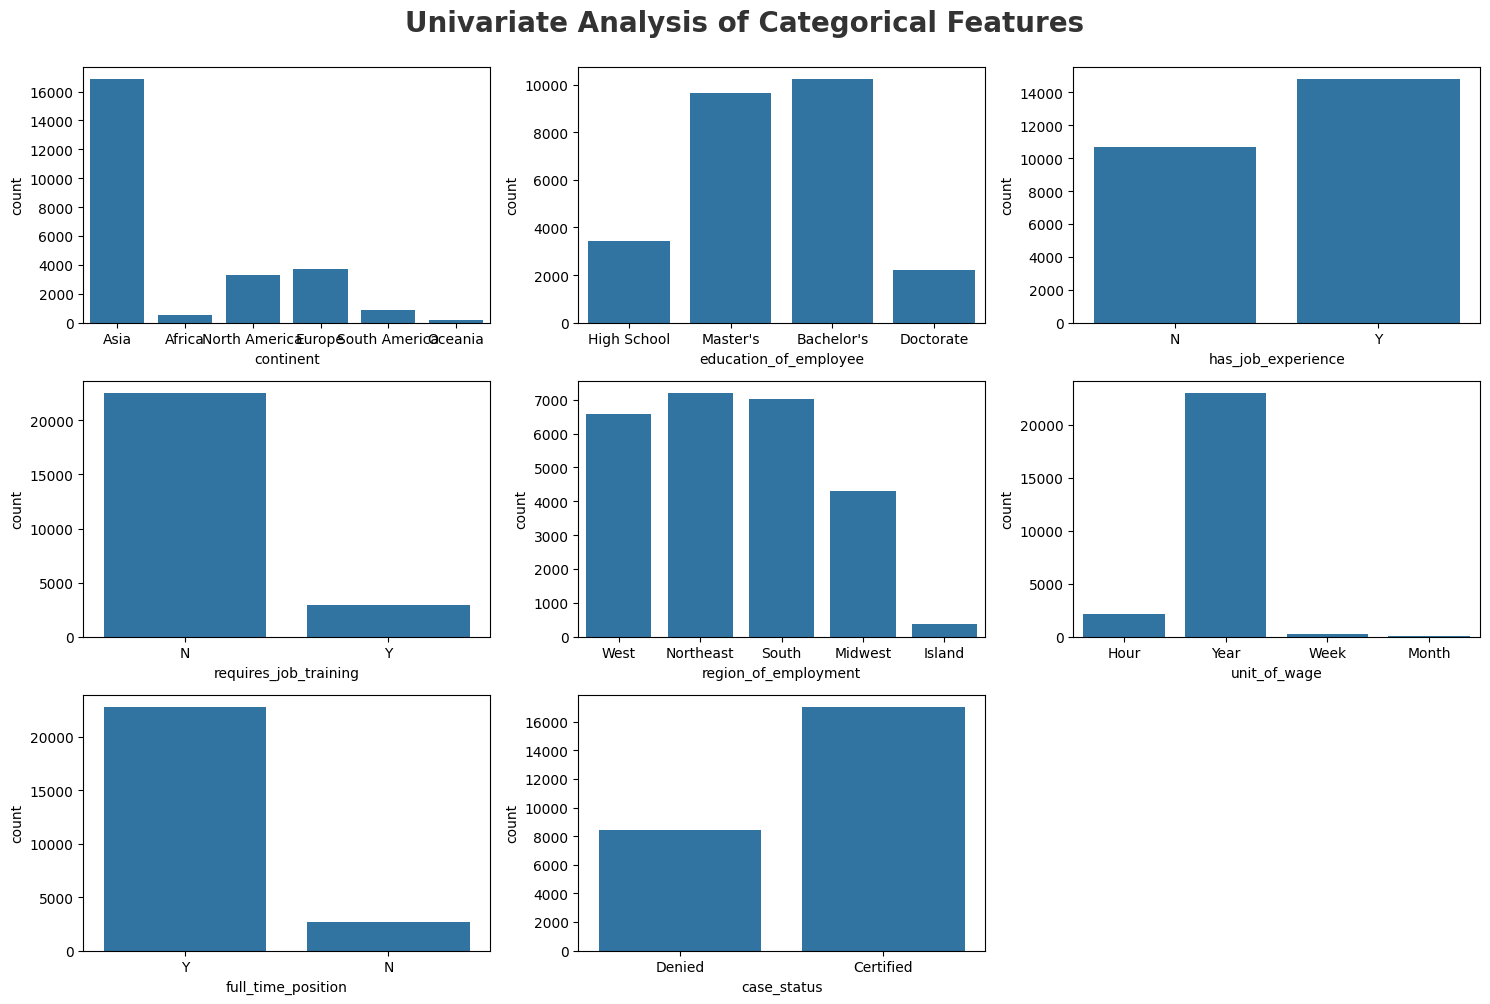

In [11]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x = df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# save plot
# plt.savefig('./images/uni_categorical_features.png')

### **Insights**

The dataset contains several imbalanced features, with the target variable (case_status) showing more "Certified" than "Denied" cases. Key features include continent (Asia dominant), education level (Bachelor's/Master's most common), job experience, and employment region. Most positions are full-time and don't require job training. 

***For effective classification:***
1. Address class imbalances, especially in the target variable
2. Perform feature engineering, potentially grouping rare categories
3. Choose models suited for categorical data (e.g., tree-based algorithms)
4. Use appropriate evaluation metrics for imbalanced data such as precision, recall, F1-score, and AUC-ROC.
5. Consider feature importance and interactions in model interpretation

Careful handling of these categorical features and imbalances will be crucial for building an accurate and robust classification model.

**Numerical Features**

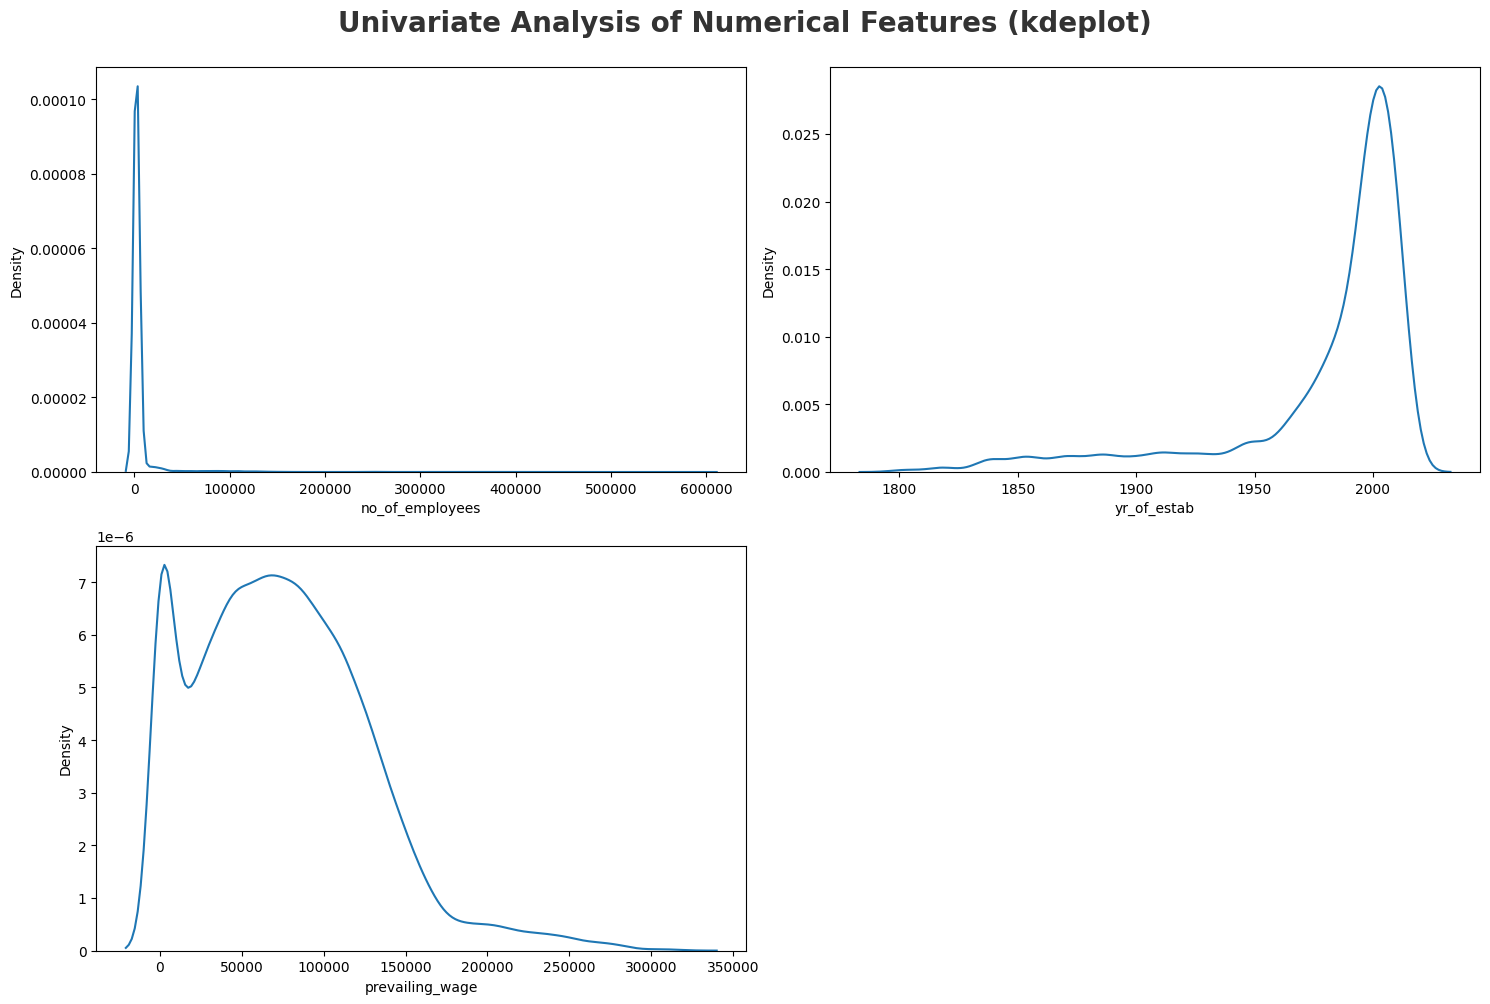

In [12]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Numerical Features (kdeplot)", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

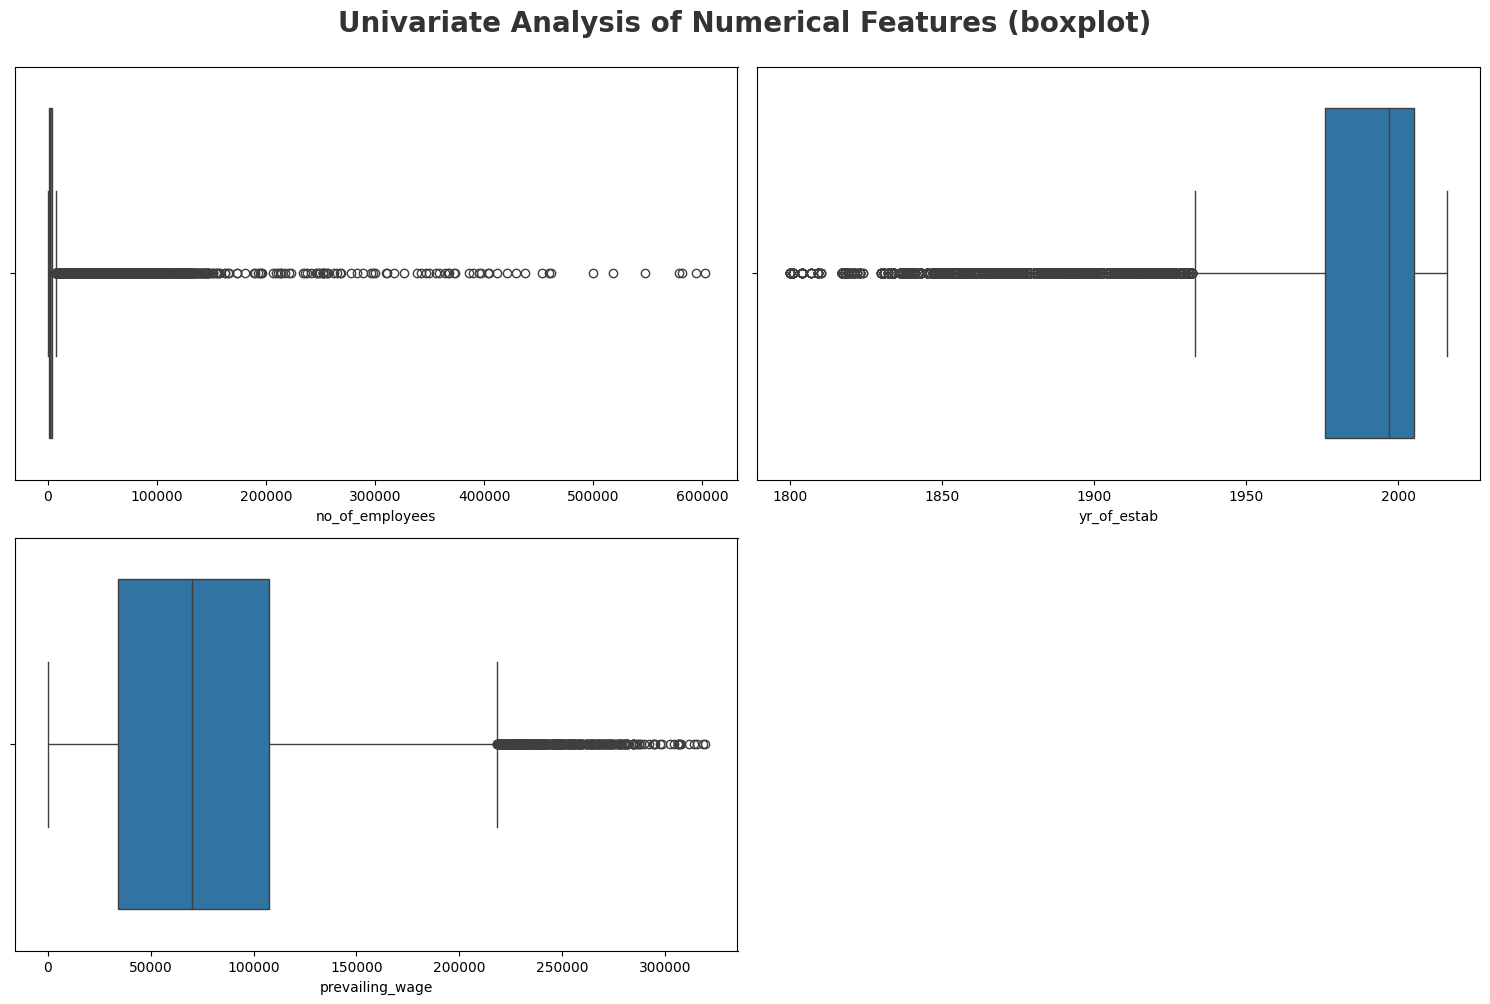

In [13]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Numerical Features (boxplot)", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### **Insights**

**1- Number of Employees (no_of_employees):**
   - Extremely right-skewed distribution with many outliers
   - Vast majority of companies have very few employees (dense peak near 0 in KDE, compressed box in box plot)
   - Long tail extending to about 600,000 employees

   ***Implications for modeling:***
   - Log-transformation is crucial to normalize this distribution
   - Consider binning into categories: "micro" (1-10), "small" (11-50), "medium" (51-250), "large" (251-1000), and "enterprise" (1000+)
   - Use tree-based models or non-linear models to capture the relationship between company size and certification status
   - Create a binary feature for "large company" (e.g., >1000 employees) to capture the effect of being an outlier

**2- Year of Establishment (yr_of_estab):**
   - Right-skewed distribution with a peak around 2000
   - Most companies established between 1950 and 2000 (wide box in box plot)
   - Some very old companies (left tail in KDE plot)

   ***Implications for modeling:***
   - Create a "company age" feature (current year - yr_of_estab)
   - Bin into categories: "startup" (<5 years), "growing" (5-20 years), "established" (20-50 years), "legacy" (50+ years)
   - Investigate non-linear relationships between company age and certification status
   - Consider interaction terms between company age and other features (e.g., age * no_of_employees)

**3- Prevailing Wage:**
   - Right-skewed distribution with multiple peaks (visible in KDE plot)
   - Majority of wages concentrated below 100,000 (compressed box in box plot)
   - Long tail extending to about 300,000 with many outliers

   ***Implications for modeling:***
   - Log-transformation to normalize the distribution
   - Create wage brackets based on percentiles or domain knowledge (e.g., "entry-level", "mid-level", "senior", "executive")
   - Investigate the relationship between wage and certification status, it's likely non-linear
   - Create binary features for high-wage outliers

### **Bivariate Analysis**

**Categorical Features**

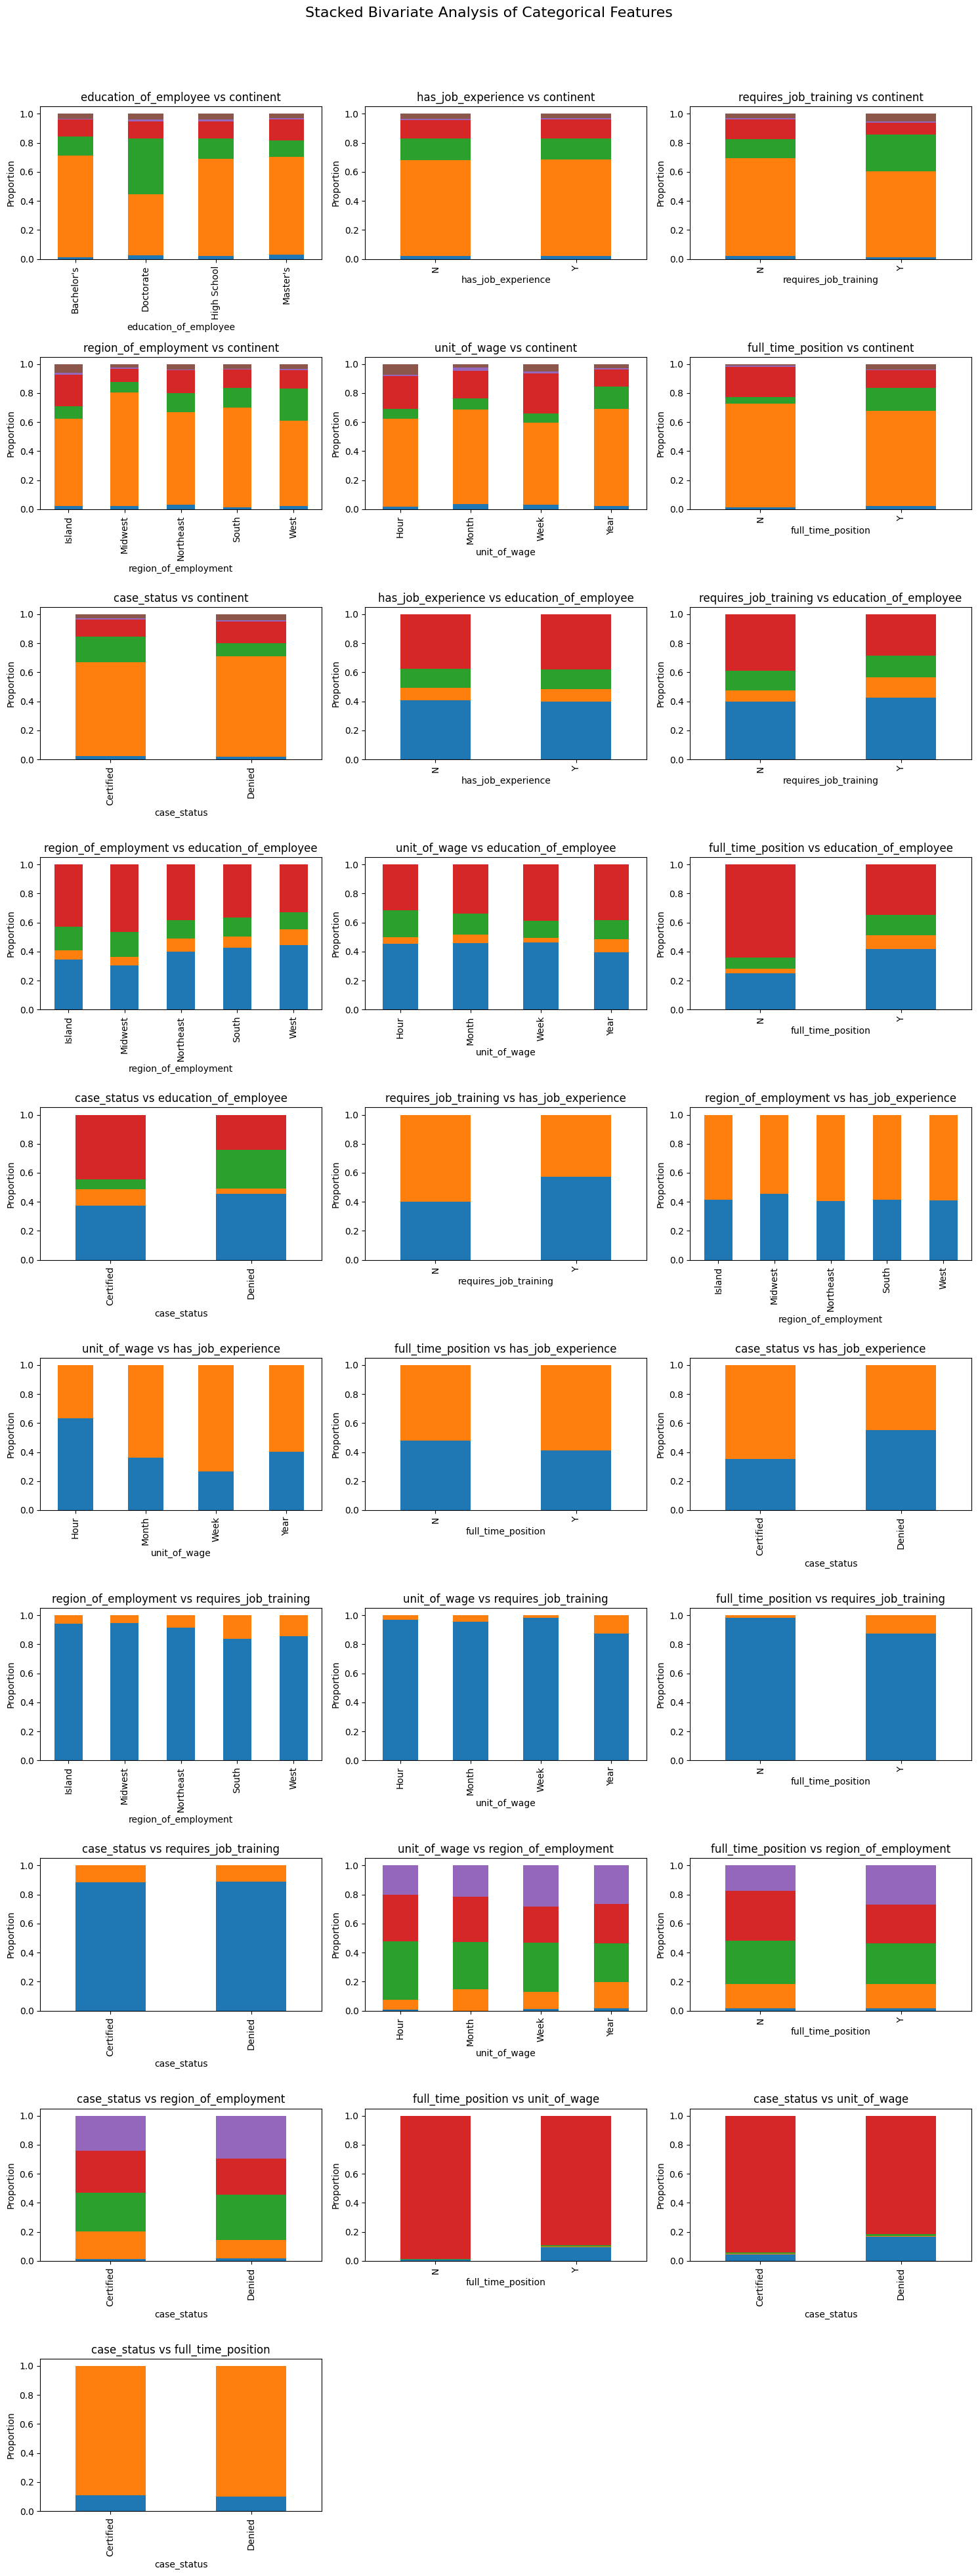

In [38]:
num_plots = sum(range(len(categorical_features)))  # Calculate total number of plots
n_cols = 3  # Number of subplots per row
n_rows = (num_plots + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten axes for easy iteration

plot_count = 0  # Initialize a counter for tracking subplots
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        if plot_count >= len(axes):  # Safeguard for too many plots
            break
        
        # Perform cross-tabulation of the two categorical features
        crosstab = pd.crosstab(df[categorical_features[j]], df[categorical_features[i]], normalize='index')
        
        # Plot stacked bar chart in the current subplot
        crosstab.plot(kind='bar', stacked=True, ax=axes[plot_count], legend=False)
        axes[plot_count].set_title(f'{categorical_features[j]} vs {categorical_features[i]}')
        axes[plot_count].set_ylabel('Proportion')
        
        plot_count += 1  # Increment plot counter

# Remove empty subplots (if any)
for k in range(plot_count, len(axes)):
    fig.delaxes(axes[k])

# Adjust layout and add global figure title
fig.suptitle('Stacked Bivariate Analysis of Categorical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap with suptitle
plt.show()

### **Insights**

1. **Target Variable**: `case_status` (Certified/Denied).

2. **Important Features**:
   - **`education_of_employee`**: Higher education (e.g., Master's, Doctorate) correlates with higher certification rates.
   - **`continent`**: Regional differences are significant, with Asia and Europe having higher approval rates.
   - **`has_job_experience`**: Job experience positively impacts approval.
   - **`full_time_position`**: Full-time positions have much higher certification rates.
   - **`unit_of_wage`**: Annual salaries are associated with higher approval likelihood.

##### Imbalanced Data:
- Imbalances in `case_status` suggest the need for resampling or weighting methods.
  
##### Model Implications:
- Use **One-Hot Encoding** for categorical features.
- Logistic Regression can serve as a baseline, while Tree-based models (Random Forests) may capture complex relationships.
- Evaluate the model with metrics like **AUC-ROC** or **F1-score** to handle imbalanced data.


### **Multivariate Analysis**

**Numerical Features**

<Figure size 1500x1000 with 0 Axes>

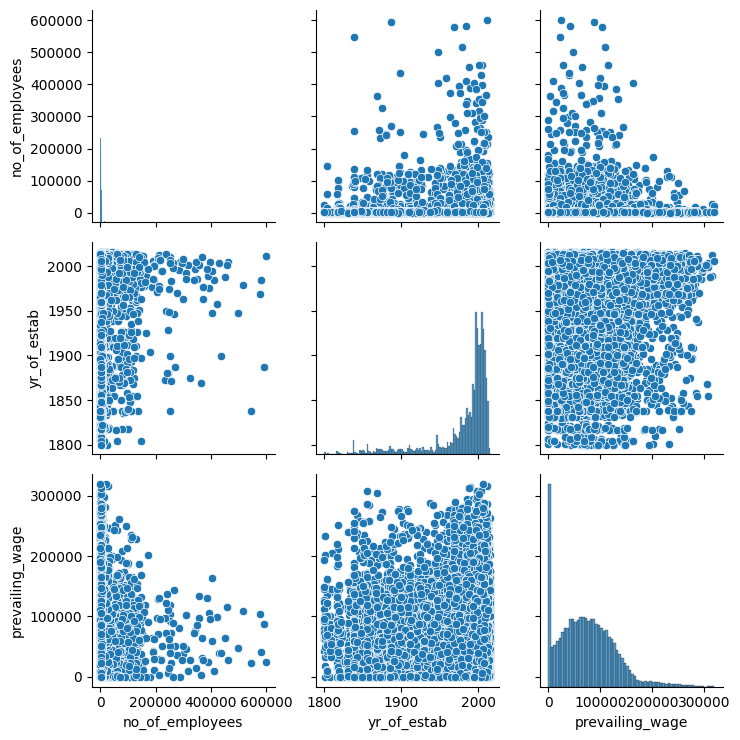

In [24]:
# Scatter plot matrix
plt.figure(figsize=(15,10))
# plt.suptitle("Scatter Plot Matrix of Numeric Features", fontsize=20, fontweight='bold', y=1.)
sns.pairplot(df[numeric_features])
plt.tight_layout()

plt.show()

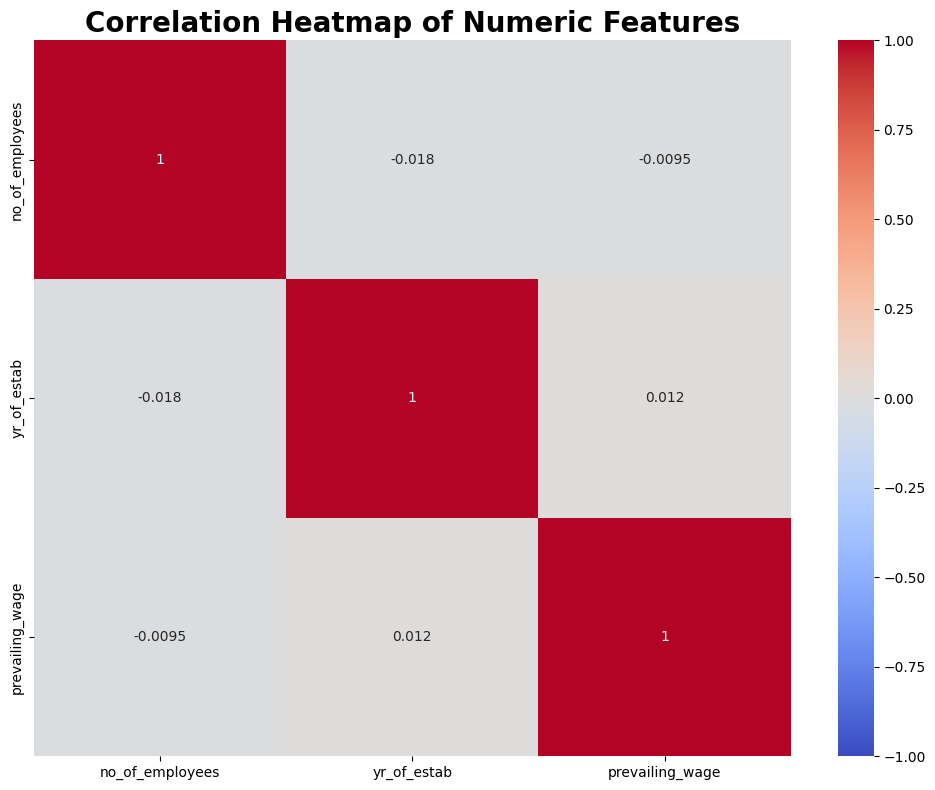

In [18]:
# Correlation heatmap
corr = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap of Numeric Features", fontsize=20, fontweight='bold', y=1.)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.tight_layout()

plt.show()

### **Insights**

Here’s a consolidated insight based on both the scatter plot matrix and the correlation heatmap of numerical features:

**1- No_of_employees**:
   - **Range**: 0 to ~600,000
   - **Distribution**: Highly skewed toward lower values with a long tail, indicating potential outliers at very high values.
   - **Recommendation**: Consider applying log transformation or binning to reduce skewness.

**2- Yr_of_estab (Year of Establishment)**:
   - **Range**: ~1800 to post-2000
   - **Distribution**: Heavily skewed toward companies established after 1900, with a concentration in more recent years.
   - **Recommendation**: Create age categories or use the feature as-is depending on its correlation with the target variable.

**3- Prevailing_wage**:
   - **Range**: 0 to ~300,000
   - **Distribution**: Right-skewed with most values on the lower end, suggesting potential high-value outliers.
   - **Recommendation**: A log transformation could help normalize this feature.

#### Correlation Analysis:
- **No_of_employees vs Yr_of_estab**: -0.018 (very weak negative correlation)
- **No_of_employees vs Prevailing_wage**: -0.0095 (negligible negative correlation)
- **Yr_of_estab vs Prevailing_wage**: 0.012 (very weak positive correlation)

#### Key Insights:
- **Feature Independence**: All correlations between the numerical features are extremely weak, indicating that these features are largely independent. This is beneficial for classification models as multicollinearity is not an issue.
- **Feature Importance**: Since the features are independent, each can contribute unique information to the model, and their individual predictive power will depend on their relationship with the target variable.

#### Summery:
- The lack of strong correlations means that the features are not redundant, and each can be considered separately. Transformations like log scaling for skewed features can improve model performance. However, the features will need to be evaluated for their direct impact on the target variable during the model-building process.

**Categorical Features**

In [30]:
from scipy.stats import chi2_contingency

In [31]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

In [32]:
n = len(categorical_features)
cramer_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i, n):
        confusion_matrix = pd.crosstab(df[categorical_features[i]], df[categorical_features[j]])
        cramer_matrix[i, j] = cramers_v(confusion_matrix)
        cramer_matrix[j, i] = cramer_matrix[i, j]

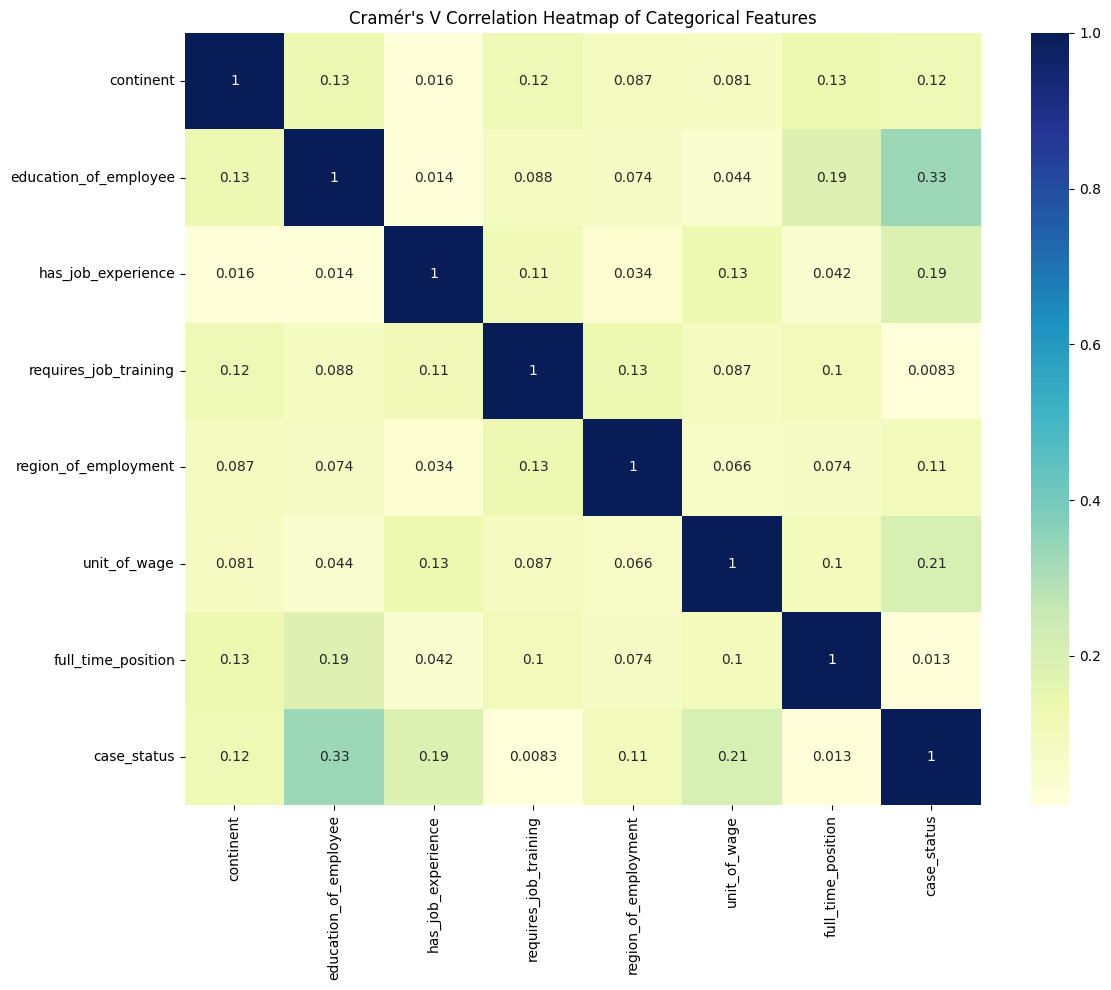

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(cramer_matrix, annot=True, xticklabels=categorical_features, yticklabels=categorical_features, cmap='YlGnBu')
plt.title("Cramér's V Correlation Heatmap of Categorical Features")
plt.tight_layout()
plt.show()

### **Insights**

**1- Education of Employee** (0.33) and **Unit of Wage** (0.21) show moderate correlation with case status, making them important features for prediction.
   
**2- Full-Time Position** (0.19) and **Job Experience** (0.19) also show moderate relevance to visa approval, suggesting they may contribute to model performance.

**3- Requires Job Training** (0.0083) and **Region of Employment** (0.11) have weak correlations, indicating they may be less impactful.

**4- Feature Independence**: Most features have weak correlations with each other, meaning multicollinearity is not a concern.

### Summery:
Focus on `education of employee`, `unit of wage`, `full-time position`, and `job experience` for the model, while weaker features can be tested but are less likely to be influential.

### **Final Report**

The dataset consists of **25,480 records** and **12 columns** with no missing values. It contains both categorical and numerical data and the target variable is **`case_status`** (Certified/Denied) with an imbalance favoring the "Certified" class (66.79% certified and 33.21% denied).

#### Key Features:
- **`no_of_employees`**: Displays significant variation, with some potential outliers (negative values and extremely large organizations).
- **`yr_of_estab`**: The organizations span from 1800 to 2016, with most established after 1950.
- **`prevailing_wage`**: Highly skewed with a wide range of wages, some potentially erroneous (e.g., minimum wage of $2.14).
- **Other categorical features** like `continent`, `education_of_employee`, `has_job_experience`, and `region_of_employment` provide additional context for employee characteristics and geography.

### Data Cleaning Insights:
**1- Outliers**: Potential outliers exist in the `no_of_employees` and `prevailing_wage` columns that may need to be addressed.

**2- Erroneous Entries**: Negative values in `no_of_employees` and abnormally low wages may indicate data entry errors requiring imputation or removal.

---

### **Feature Engineering Recommendations**

To enhance the predictive power of the classification model, feature engineering is essential:

#### **1- Handling Skewed Distributions:**
   - ***Log transformation***: Apply to highly skewed columns like `no_of_employees` and `prevailing_wage` to reduce the impact of outliers and normalize distributions.
   
#### **2- Creating New Features:**
   - ***Company Age***: Derive a new feature by subtracting `yr_of_estab` from the current year (e.g., "company_age"). This could offer a more meaningful interpretation than the raw year of establishment.
   - ***Binned Employee Size***: Group `no_of_employees` into categories such as micro, small, medium, large, and enterprise to capture company size as a categorical feature.
   - ***Wage Brackets***: Create wage brackets based on prevailing wage percentiles (e.g., entry-level, mid-level, senior) to make wage more interpretable.

#### **3- Addressing Class Imbalance:**
   - ***Resampling techniques***: Use SMOTE (Synthetic Minority Over-sampling Technique) or class-weighted algorithms to address the class imbalance in `case_status`.

#### **4- One-Hot Encoding of Categorical Features:**
   - ***Convert categorical features*** such as `continent`, `education_of_employee`, `region_of_employment`, and `unit_of_wage` into dummy variables.
   
#### **5- Interaction Terms:**
   - ***Interaction between features***: Consider interactions between features like `company_age` and `no_of_employees` or `prevailing_wage` and `education_of_employee` to uncover non-linear relationships.

#### **6- Feature Importance & Selection:**
   - ***Mutual information*** or ***Chi-squared tests*** can help identify the most influential categorical features for visa approval.
   - ***Recursive feature elimination (RFE)*** could help identify which features provide the most predictive value.

---

### Conclusion
For a successful classification model, focus on cleaning the data, addressing outliers, and engineering features that capture the underlying trends. Combining feature engineering with resampling and advanced modeling techniques (e.g., Random Forests, XGBoost) will likely improve the model's performance in predicting visa approval outcomes.